In [28]:
import os
import torch
import matplotlib.pyplot as plt


In [29]:
def load_results_from_checkpoints(checkpoint_dir, model_name):
    """
    Load results from checkpoints.

    Args:
        checkpoint_dir (str): Directory containing checkpoint files.

    Returns:
        results (dict): Dictionary containing lists of train_loss, train_acc, test_loss, and test_acc.
    """
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    checkpoint_files = sorted([f for f in os.listdir(checkpoint_dir) if f.endswith('.pth') and f.__contains__(model_name)])

    for checkpoint_file in checkpoint_files:
        checkpoint_path = os.path.join(checkpoint_dir, checkpoint_file)
        checkpoint = torch.load(checkpoint_path)
        results["train_loss"].append(checkpoint['train_loss'])
        results["train_acc"].append(checkpoint['train_acc'])
        results["test_loss"].append(checkpoint['test_loss'])
        results["test_acc"].append(checkpoint['test_acc'])

    return results

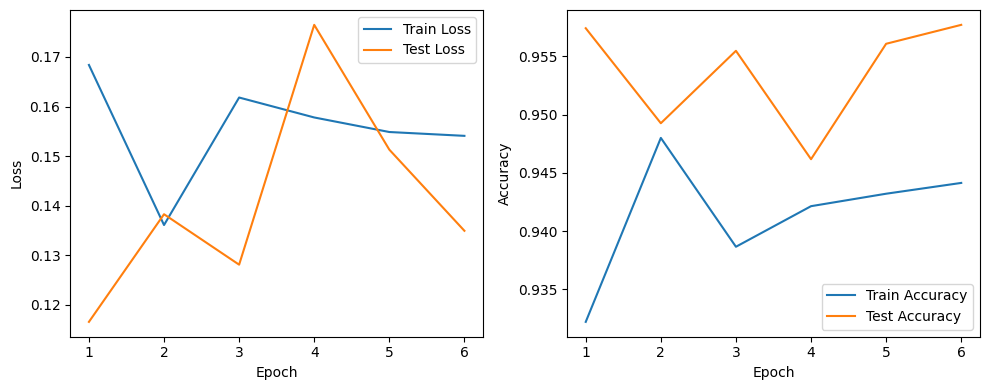

In [33]:
def plot_results(results):
    """
    Plot results.

    Args:
        results (dict): Dictionary containing lists of train_loss, train_acc, test_loss, and test_acc.
    """
    epochs = range(1, len(results["train_loss"]) + 1)

    plt.figure(figsize=(10, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, results["train_loss"], label="Train Loss")
    plt.plot(epochs, results["test_loss"], label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, results["train_acc"], label="Train Accuracy")
    plt.plot(epochs, results["test_acc"], label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

checkpoint_dir = "checkpoints"  # Directory containing checkpoint files
model_name = "EfficientNetV2"  # Model name
results = load_results_from_checkpoints(checkpoint_dir, model_name)
plot_results(results)

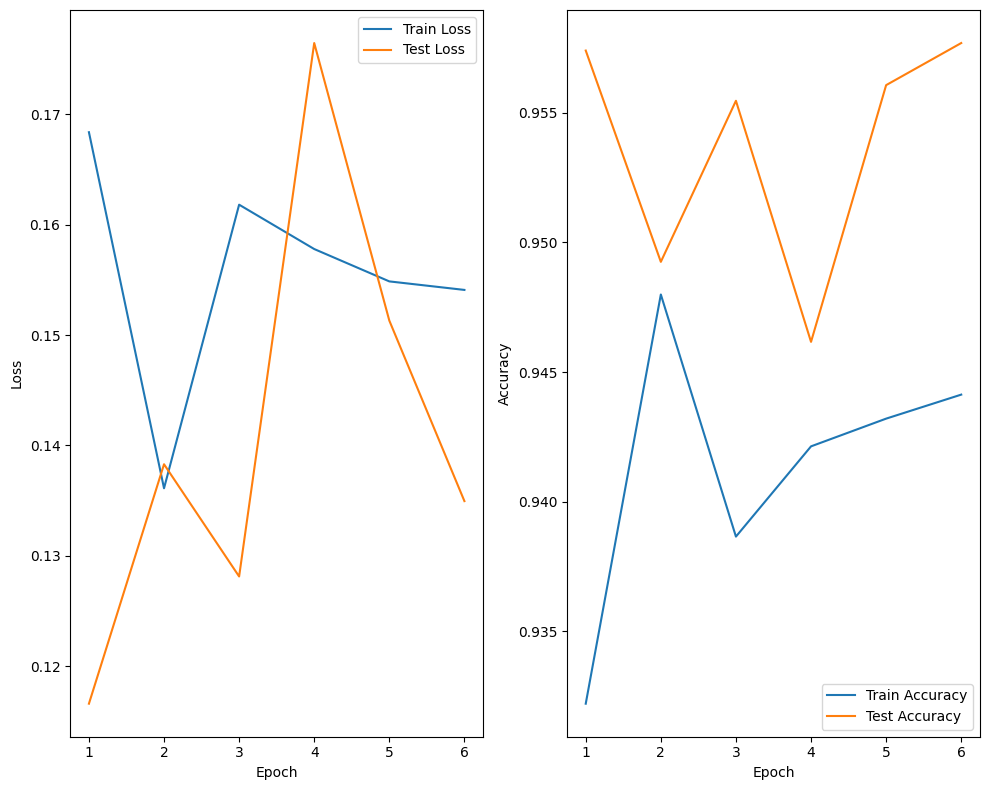

In [31]:
checkpoint_dir = "checkpoints"  # Directory containing checkpoint files
model_name = "EfficientNetV2"  # Model name
results = load_results_from_checkpoints(checkpoint_dir, model_name)
plot_results(results)